0. Package Import and Data Loading
1. Feature engineering
2. Variable correlation
3. Removing outliers
4. Pickling

## 0. Import packages
Load the necessary packages for this exercise

In [3]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns

In [4]:
#show plots in jupyter notebook
%matplotlib inline

In [5]:
# Set plot style
sns.set(color_codes=True)

In [6]:
#Set maximum number of columns to be displayed
pd.set_option('display.max_columns',100)

## Loading data
### Data directory
Explicitly show how paths are indicated

In [7]:
PICKLE_TRAIN_DIR=os.path.join(".","processed_data","train_data.pkl")
PICKLE_HISTORY_DIR=os.path.join(".","processed_data","history_data.pkl")

In [8]:
history_data = pd.read_pickle(PICKLE_HISTORY_DIR) 
train = pd.read_pickle(PICKLE_TRAIN_DIR)

## 1. Feature Engineering
Since we have the consumption data for each of the companies for the year 2015, we will create new features using the average of the year, the last six months, and the last three months to our model.

In [9]:
history_data['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

In [13]:
history_data.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [10]:
mean_year=history_data.groupby(['id']).mean().reset_index()

In [15]:
mean_6m=history_data[history_data['price_date']>'2015-06-01'].groupby(['id']).mean().reset_index()

In [16]:
mean_3m=history_data[history_data['price_date']>'2015-10-01'].groupby(['id']).mean().reset_index()

In [17]:
mean_year.head(3)

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.07316,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.00000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.00000,45.319710,0.000000,0.000000


In [18]:
###Combine them in a single dataframe
mean_year = mean_year.rename(index=str, columns={"price_p1_var": "mean_year_price_p1_var", "price_p2_var": "mean_year_price_p2_var", "price_p3_var": "mean_year_price_p3_var", "price_p1_fix": "mean_year_price_p1_fix", "price_p2_fix": "mean_year_price_p2_fix",
"price_p3_fix": "mean_year_price_p3_fix",}) 
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"] 
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"] 
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

In [20]:
mean_6m = mean_6m.rename(index=str, columns={"price_p1_var": "mean_6m_price_p1_var", "price_p2_var": "mean_6m_price_p2_var", "price_p3_var": "mean_6m_price_p3_var", "price_p1_fix": "mean_6m_price_p1_fix", "price_p2_fix": "mean_6m_price_p2_fix",
"price_p3_fix": "mean_6m_price_p3_fix",}) 
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"] 
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"] 
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

In [21]:
mean_3m = mean_3m.rename(index=str, columns={"price_p1_var": "mean_3m_price_p1_var", "price_p2_var": "mean_3m_price_p2_var", "price_p3_var": "mean_3m_price_p3_var", "price_p1_fix": "mean_3m_price_p1_fix", "price_p2_fix": "mean_3m_price_p2_fix",
"price_p3_fix": "mean_3m_price_p3_fix",}) 
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"] 
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"] 
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

Now we will merge them into a single dataframe
Note: I am not confident the mean_6m and mean_3m could help the prediction model. We will see below the variables are also highly correlated to
actually using only the mean_year is OK

In [22]:
#features = pd.merge(mean_year,mean_6m, on="id").merge(mean_3m,on='id')
features=mean_year

### 2. churn by dates variabls
In the previous notebook we explored the data and made a deep dive into the churn by dates. Nonetheless, that exploration was quite shallow and did not provide us with any relevant insight.
What if we could create a new variable that could provide us more relevant insights? We will define a variable tenure = date_end - date_activ

In [24]:
train['date_end']

0       2016-11-06
1       2016-06-15
2       2016-08-30
3       2016-04-16
4       2016-03-30
           ...    
16091   2016-05-08
16092   2016-08-27
16093   2016-02-07
16094   2016-08-30
16095   2016-12-17
Name: date_end, Length: 16096, dtype: datetime64[ns]

In [25]:
train['tenure']=((train['date_end']-train['date_activ'])/ np.timedelta64(1, "Y")).astype(int)

In [26]:
tenure = train[["tenure", "churn", "id"]].groupby(["tenure", "churn"])["id"].count().unstack(level=1) 
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)

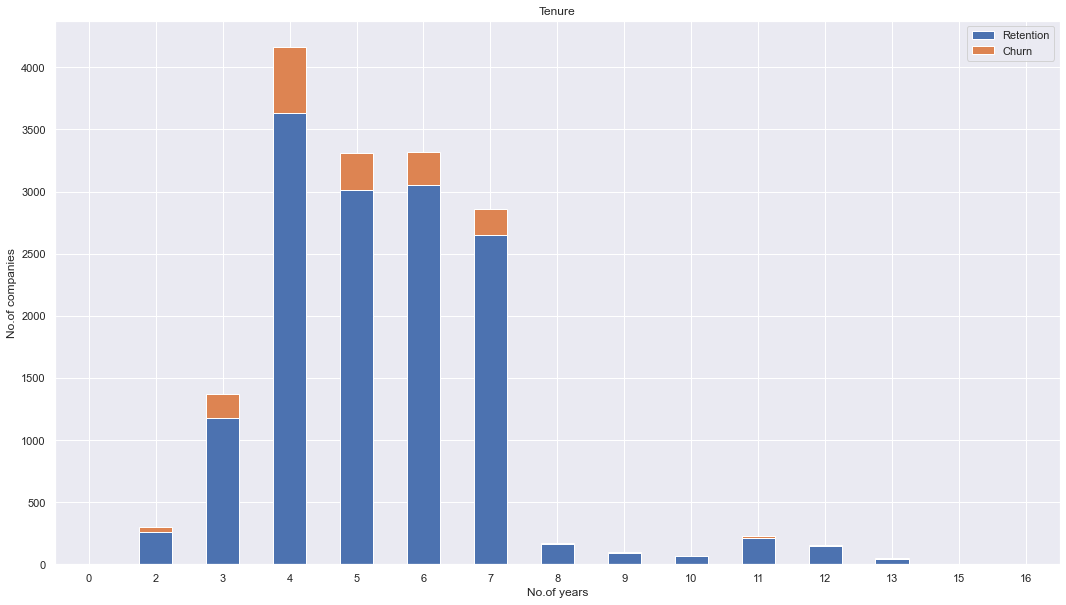

In [28]:
tenure.plot(kind='bar',figsize=(18,10),stacked=True,rot=0,title='Tenure')
#Rename legend
plt.legend(['Retention','Churn'],loc='upper right')
#Labels
_=plt.ylabel('No.of companies')
_=plt.xlabel('No.of years')
plt.show()

We can clearly that churn is very low for companies which joined recently or that have made the contract a long time ago. With the higher number of churners within the 3-7 years of tenure.

We will also transform the dates provided in such a way that we can make more sense out of those. 
months_activ : Number of months active until reference date (Jan 2016)

months_to_end : Number of months of the contract left at reference date (Jan 2016)

months_modif_prod : Number of months since last modification at reference date (Jan 2016)

months_renewal : Number of months since last renewal at reference date (Jan 2016)

To create the month column we will follow a simple process:
   1. Substract the reference date and the column date
   2. Convert the timedelta in months
   3. Convert to integer (we are not interested in having decimal months)

In [29]:
def convert_months(reference_date,dataframe,column):
    """
    Input a column with timedeltas and return months
    """
    time_delta=reference_date-dataframe[column]
    months=(time_delta/np.timedelta64(1,'M')).astype(int)
    return months

In [30]:
REFERENCE_DATE=datetime.datetime(2016,1,1)

In [31]:
train["months_activ"] = convert_months(REFERENCE_DATE, train, "date_activ") 
train["months_to_end"] = -convert_months(REFERENCE_DATE, train, "date_end") 
train["months_modif_prod"] = convert_months(REFERENCE_DATE, train, "date_modif_prod") 
train["months_renewal"] = convert_months(REFERENCE_DATE, train, "date_renewal")

In [32]:
train["months_activ"] 

0        37
1        30
2        76
3        68
4        69
         ..
16091    43
16092    40
16093    46
16094    40
16095    72
Name: months_activ, Length: 16096, dtype: int64

In [33]:
def plot_churn_by_month(dataframe,column,fontsize_=11):
    """
    Plot churn distribution by monthly variable
    """
    temp=dataframe[[column,'churn','id']].groupby([column,'churn'])['id'].count().unstack(level=1)
    temp.plot(kind='bar',figsize=(18,10),stacked=True,rot=0,title=column)
    #Rename legend
    plt.legend(['Retention','Churn'],loc='upper right')
    #Labels
    _=plt.ylabel('No. of companies')
    _=plt.xlabel('No.of months')
    #set xlabel fontsize
    plt.xticks(fontsize=fontsize_)
    plt.show()

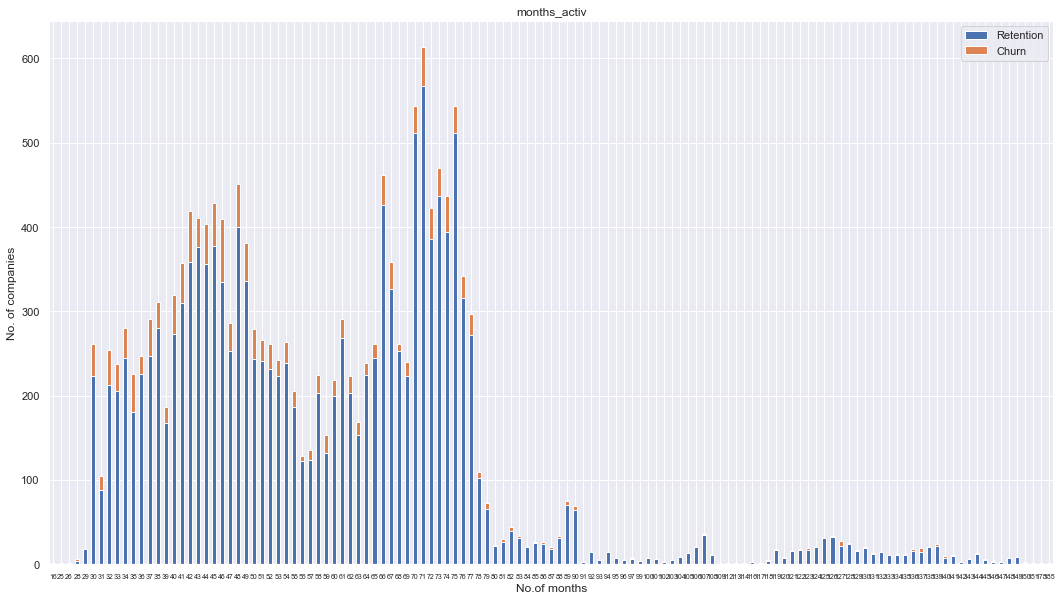

In [34]:
plot_churn_by_month(train,'months_activ',7)

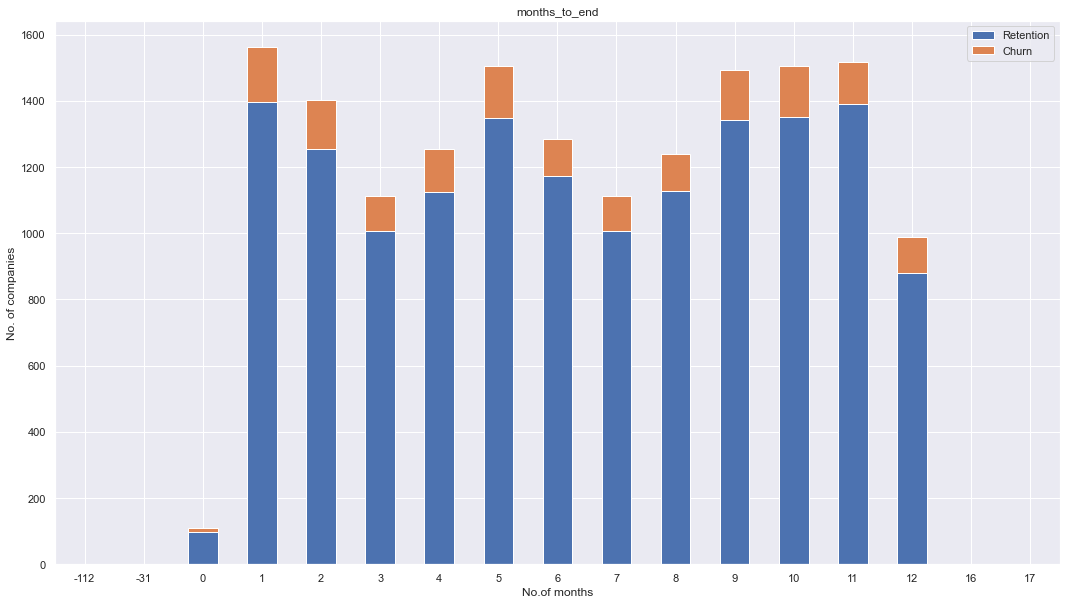

In [79]:
plot_churn_by_month(train, "months_to_end")

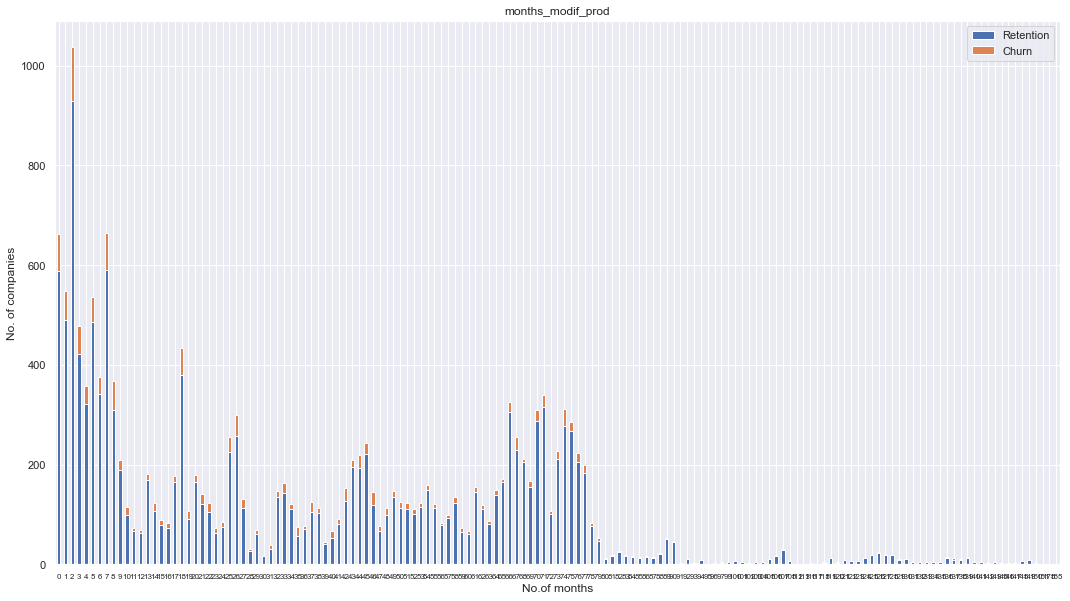

In [80]:
plot_churn_by_month(train, "months_modif_prod", 8)

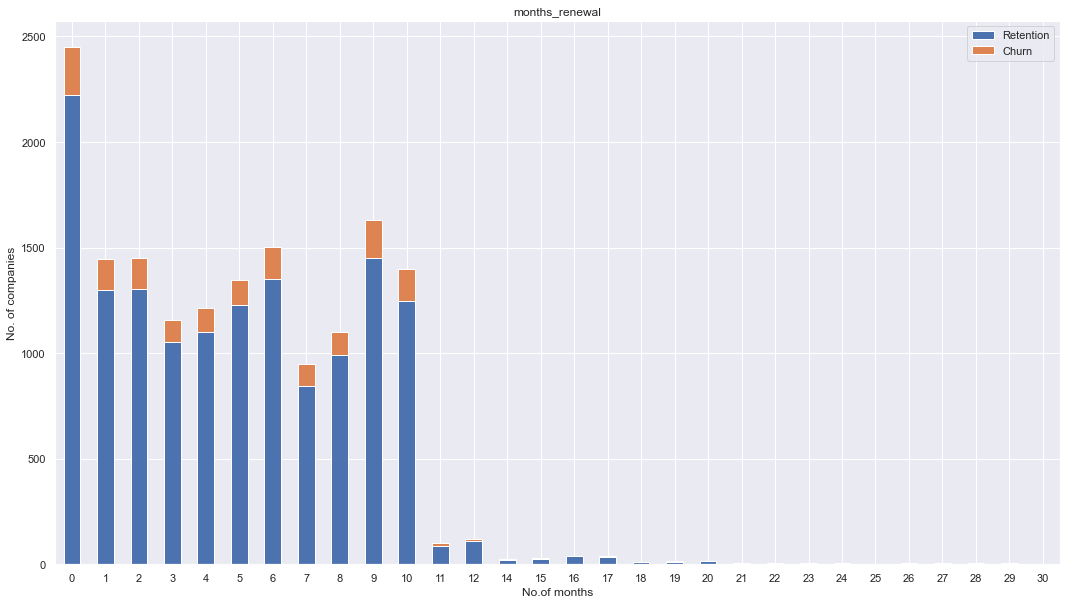

In [81]:
plot_churn_by_month(train, "months_renewal")

Remove the date columns

In [82]:
train.drop(columns=["date_activ", "date_end", "date_modif_prod", "date_renewal"],inplace=True)

### Transforming boolean data
For the column has_gas, we will replace t for True or 1 and f for False or 0 . This process is usually referred as onehot encoding


In [35]:
train['has_gas']=train['has_gas'].replace(['t','f'],[1,0])

### Categorical data and dummy variables
When training our model we cannot use string data as such, so we will need to encode it into numerical data. The easiest method is mapping each category to an integer ( label encoding ) but this will not work because the model will misunderstand the data to be in some kind of order or hierarchy, 0 < 1 < 2 < 3 ...
For that reason we will use a method with dummy variables or onehot encoder

#### Categorical data channel_sales
What we are doing here relatively simple, we want to convert each category into a new dummy variable which will have 0 s and 1 s depending whether that entry belongs to that particular category or not.

First of all let's replace the Nan values with a string called null_values_channel

In [39]:
train["channel_sales"]=train["channel_sales"].fillna('null_values_channel')

Now transform the channel_sales column into categorical data type.

In [41]:
# Transform to categorical data type
train["channel_sales"] = train["channel_sales"].astype("category")

In [42]:
pd.DataFrame({'Samples in category':train['channel_sales'].value_counts()})

,Samples in category
foosdfpfkusacimwkcsosbicdxkicaua,7377
null_values_channel,4218
lmkebamcaaclubfxadlmueccxoimlema,2073
usilxuppasemubllopkaafesmlibmsdf,1444
ewpakwlliwisiwduibdlfmalxowmwpci,966
sddiedcslfslkckwlfkdpoeeailfpeds,12
epumfxlbckeskwekxbiuasklxalciiuu,4
fixdbufsefwooaasfcxdxadsiekoceaa,2


So that means we will create 8 different dummy variables . Each variable will become a different column.

In [43]:
# Create dummy variables
categories_channel = pd.get_dummies(train["channel_sales"], prefix = "channel")

In [46]:
#Rename columns for simplicity
categories_channel.columns=[col_name[:11] for col_name in categories_channel.columns]

In [47]:
categories_channel.head(5)

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_nul,channel_sdd,channel_usi
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0


In [48]:
#remove multicolinearity
categories_channel.drop(columns=["channel_nul"],inplace=True)

#### Categorical data origin_up
First of all let's replace the Nan values with a string called null_values_origin


In [51]:
train['origin_up']=train['origin_up'].fillna('null_values_origin')

Now transform the origin_up column into categorical data type

In [52]:
train["origin_up"] = train["origin_up"].astype("category")

In [54]:
pd.DataFrame({'origin_up':train['origin_up'].value_counts()})

,origin_up
lxidpiddsbxsbosboudacockeimpuepw,7825
kamkkxfxxuwbdslkwifmmcsiusiuosws,4517
ldkssxwpmemidmecebumciepifcamkci,3664
null_values_origin,87
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


So that means we will create 8 different dummy variables . Each variable will become a different column.

In [55]:
categories_origin=pd.get_dummies(train['origin_up'],prefix='origin')
categories_origin.columns=[col_name[:10]for col_name in categories_origin.columns]

In [57]:
categories_origin.head()

,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_nul,origin_usa
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [58]:
#remove one column to avoid multicolinearity
categories_origin.drop(columns=['origin_nul'],inplace=True)

### categorical data- activity new

In [59]:
train['activity_new']=train['activity_new'].fillna('null_values_activity')

In [61]:
categories_activity=pd.DataFrame({'Activity samples':train['activity_new'].value_counts()})
categories_activity

,Activity samples
null_values_activity,9545
apdekpcbwosbxepsfxclislboipuxpop,1577
kkklcdamwfafdcfwofuscwfwadblfmce,422
kwuslieomapmswolewpobpplkaooaaew,230
fmwdwsxillemwbbwelxsampiuwwpcdcb,219
...,...
sadbemboabpaxoesiucxoseffukxwsma,1
xbwipkcuemuidpumuiomukkicculdmsb,1
ewaupfkppoboxiuilledxxlwieawexel,1
moaawbkafpwcopipaxsoklsuuoexkaap,1


In [68]:
categories_activity['Activity samples'].describe()

count     420.000000
mean       38.323810
std       472.208572
min         1.000000
25%         2.000000
50%         4.000000
75%        10.000000
max      9545.000000
Name: Activity samples, dtype: float64

As we can see below there are too many categories with very few number of samples. So we will replace any category with less than 75 samples as null_values_category

In [75]:
to_replace=list(categories_activity[categories_activity['Activity samples']<75].index)
train['activity_new']=train['activity_new'].replace(to_replace,'null_values_activity')

In [77]:
categories_activity=pd.get_dummies(train['activity_new'],prefix='activity')
categories_activity.columns=[col_name[:12] for col_name in categories_activity.columns]

In [78]:
categories_activity.head(5)

,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_nul,activity_sff,activity_sfi,activity_wxe
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [80]:
categories_activity.drop(columns=['activity_nul'],inplace=True)

### Merge dummy variables to main dataframe
We will merge all the new categories into our main dataframe and remove the old categorical columns

In [81]:
#Use common index to merge
train=pd.merge(train,categories_channel,left_index=True,right_index=True)
train=pd.merge(train,categories_origin,left_index=True,right_index=True)
train=pd.merge(train,categories_activity,left_index=True,right_index=True)

In [83]:
train.drop(columns=['channel_sales','origin_up','activity_new'],inplace=True)

## Log Transformation
A lot of variables are highly skewed to the right, so we will use log transformation. A lot of model has the assumptions of normal distribution of variables.

In [84]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sff,activity_sfi,activity_wxe
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,0.184145,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093,5.329958,58.929858,6.376615,35.741240,4.924640,0.000249,0.060015,0.000124,0.458313,0.128790,0.000746,0.089712,0.000062,0.280629,0.227634,0.486146,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.004660,0.005157,0.007393
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,0.387615,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796,1.749248,20.125024,3.633479,30.609746,3.812127,0.015763,0.237522,0.011147,0.498275,0.334978,0.027295,0.285777,0.007882,0.449320,0.419318,0.499824,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.068104,0.071626,0.085668
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,0.000000,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,16.000000,-112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000,4.000000,44.000000,3.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,0.000000,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000,5.000000,57.000000,6.000000,29.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,0.000000,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000,6.000000,71.000000,9.000000,64.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,17537

A lot of variables have greater mean than medium, which indicates the skewness.

Log transform does not work with negative data, so we will convert the negative values to NaN and add a constant 1 to 0 valued entries.

In [88]:
train.loc[train['cons_12m']<0,'cons_12m']=np.nan

In [89]:
train['cons_12m'].describe()

count    1.606900e+04
mean     1.951613e+05
std      6.800282e+05
min      0.000000e+00
25%      5.939000e+03
50%      1.539500e+04
75%      5.029200e+04
max      1.609711e+07
Name: cons_12m, dtype: float64

In [97]:
train.loc[train.cons_gas_12m < 0,"cons_gas_12m"]=np.nan

In [98]:
train.loc[train['cons_last_month']<0,'cons_last_month']=np.nan
train.loc[train['forecast_cons_12m']<0,'forecast_cons_12m']=np.nan
train.loc[train['forecast_cons_year']<0,'forecast_cons_year']=np.nan
train.loc[train.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan 
train.loc[train.imp_cons < 0,"imp_cons"] = np.nan

In [99]:
# Apply log10 transformation
train["cons_12m"] = np.log10(train["cons_12m"]+1)
train["cons_gas_12m"] = np.log10(train["cons_gas_12m"]+1) 
train["cons_last_month"] = np.log10(train["cons_last_month"]+1) 
train["forecast_cons_12m"] = np.log10(train["forecast_cons_12m"]+1) 
train["forecast_cons_year"] = np.log10(train["forecast_cons_year"]+1) 
train["forecast_meter_rent_12m"] = np.log10(train["forecast_meter_rent_12m"]+1) 
train["imp_cons"] = np.log10(train["imp_cons"]+1)

Now let's see how the distribution looks like.

/Users/yiranxu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yiranxu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yiranxu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

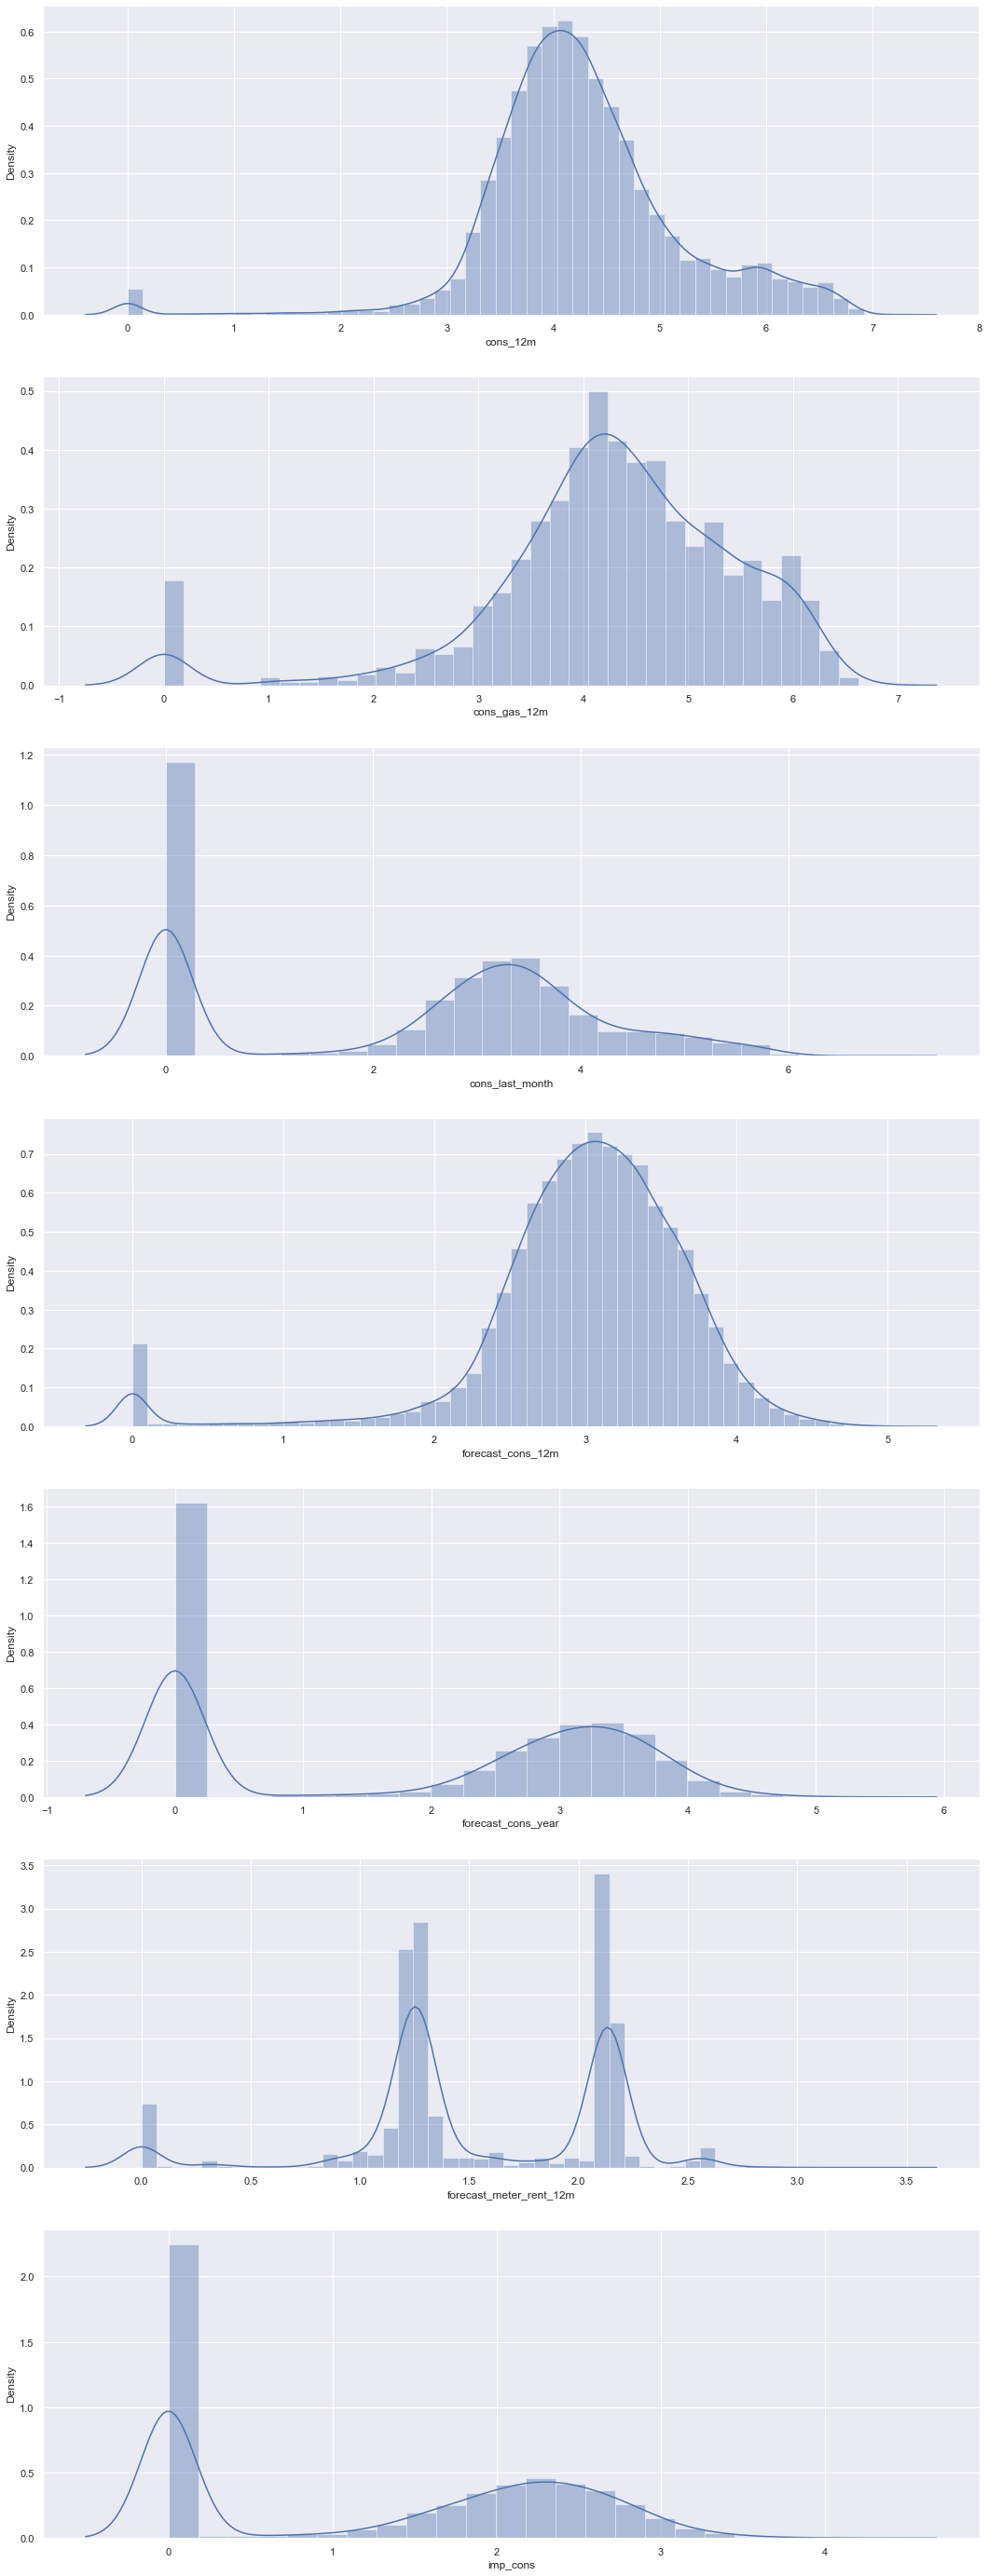

In [108]:
fig,axs=plt.subplots(nrows=7,figsize=(18,50))
#Plot histograms
sns.distplot((train["cons_12m"].dropna()), ax=axs[0]) 
sns.distplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1]) 
sns.distplot((train["cons_last_month"].dropna()), ax=axs[2]) 
sns.distplot((train["forecast_cons_12m"].dropna()), ax=axs[3]) 
sns.distplot((train["forecast_cons_year"].dropna()), ax=axs[4]) 
sns.distplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5]) 
sns.distplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

/Users/yiranxu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yiranxu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yiranxu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

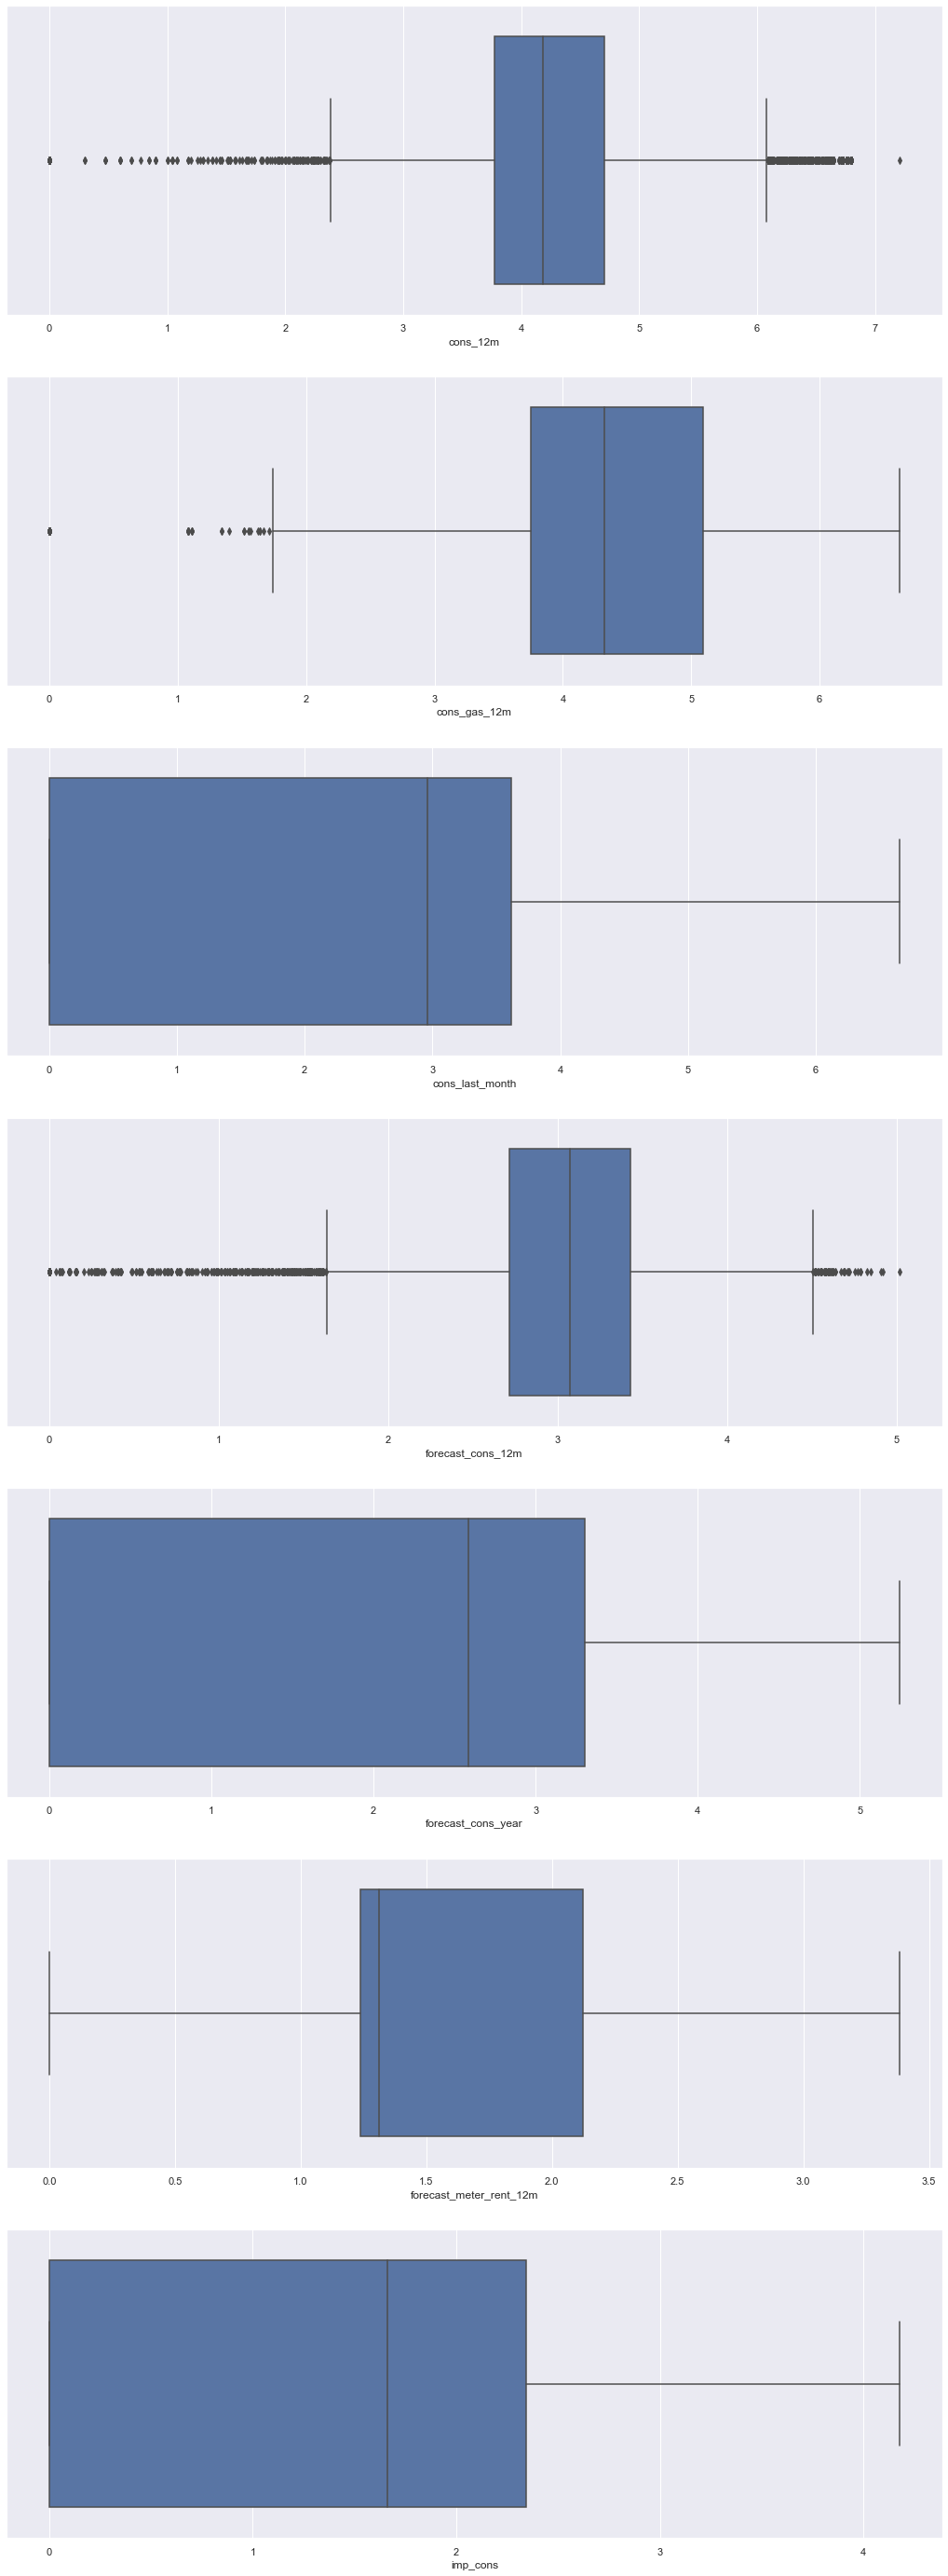

In [110]:
fig,axs=plt.subplots(nrows=7,figsize=(18,50))
sns.boxplot((train['cons_12m'].dropna()),ax=axs[0])
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1]) 
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2]) 
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3]) 
sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4]) 
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5]) 
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

In [111]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sff,activity_sfi,activity_wxe
count,16069.000000,16090.000000,16050.000000,16055.000000,16071.000000,15970.000000,16092.000000,15970.000000,15970.000000,15970.000000,16096.000000,16069.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,4.283812,0.800300,2.359281,3.006826,1.869956,0.991547,1.549610,0.135901,0.052951,43.533496,0.184145,1.305021,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093,5.329958,58.929858,6.376615,35.741240,4.924640,0.000249,0.060015,0.000124,0.458313,0.128790,0.000746,0.089712,0.000062,0.280629,0.227634,0.486146,0.000124,0.097975,0.011742,0.007393,0.007580,0.013606,0.026218,0.014289,0.004660,0.005157,0.007393
std,0.915265,1.748833,1.789067,0.709778,1.612963,5.160969,0.589394,0.026252,0.048617,5.212252,0.387615,1.165532,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796,1.749248,20.125024,3.633479,30.609746,3.812127,0.015763,0.237522,0.011147,0.498275,0.334978,0.027295,0.285777,0.007882,0.449320,0.419318,0.499824,0.011147,0.297290,0.107726,0.085668,0.086733,0.115852,0.159787,0.118684,0.068104,0.071626,0.085668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.122184,0.000000,0.000000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,16.000000,-112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.773786,0.000000,0.000000,2.713952,0.000000,0.000000,1.236285,0.115237,0.000000,40.606701,0.000000,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000,4.000000,44.000000,3.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.187408,0.000000,2.959041,3.073579,2.583199,0.000000,1.310481,0.142881,0.086163,44.311378,0.000000,1.662380,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000,5.000000,57.000000,6.000000,29.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.701508,0.000000,3.617000,3.430950,3.301030,0.000000,2.122126,0.146348,0.098837,44.311378,0.000000,2.341118,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000,6.000000,71.000000,9.000000,64.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.206748,6.622052,6.656933,5.016210,5.243970,50.000000,3.382502,0.273963,0.195975,59.444710,1.000000,4.177357,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000,16.

The distributions look much closer to normal distributions now!
Notice how the standard deviation std has changed.
From the boxplots we can still see some values are quite far from the range ( outliers ). We will deal with them later.

## 2. High correlation variables
Calculate the correlation of the variables

In [112]:
# Calculate correlation of variables
correlation = features.corr()

In [114]:
correlation.columns.values

array(['mean_year_price_p1_var', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3'],
      dtype=object)

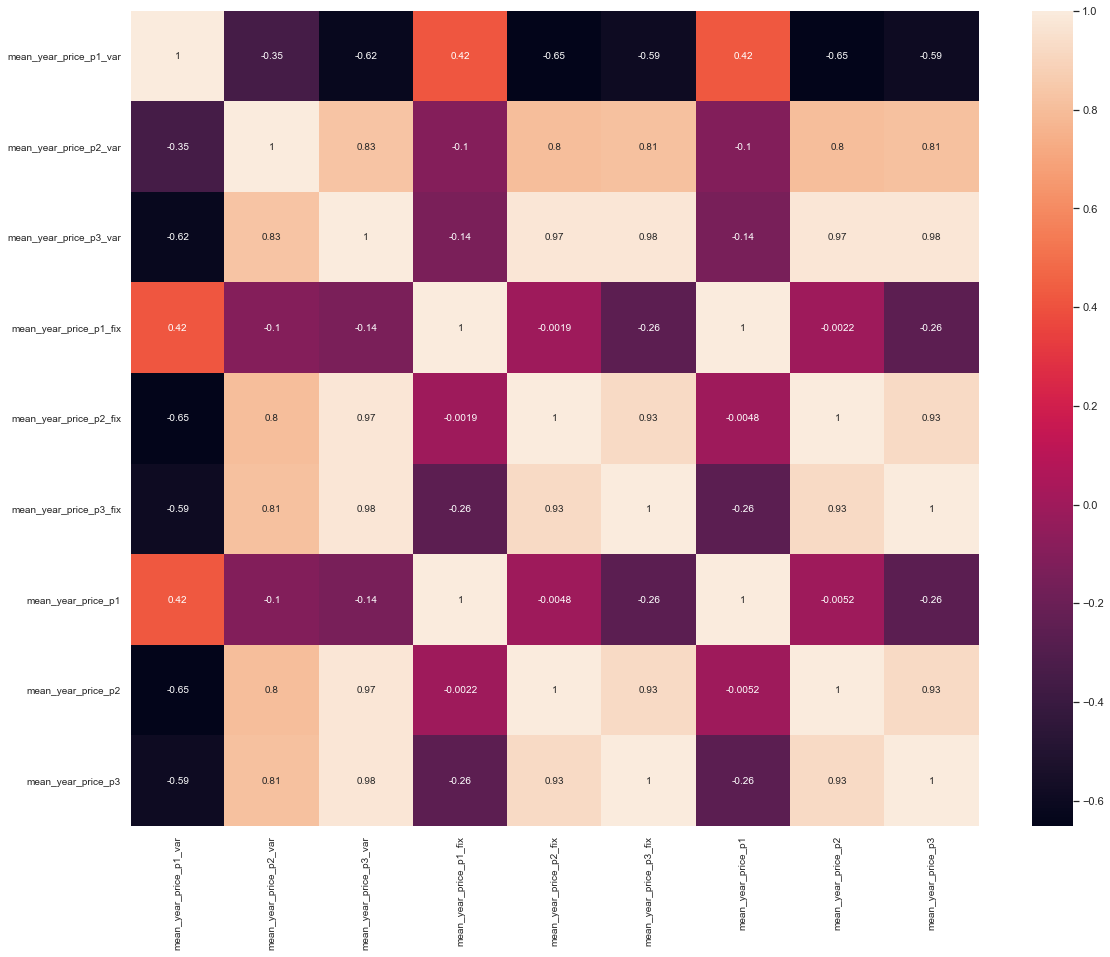

In [116]:
#plot correlation
plt.figure(figsize=(19,15))
sns.heatmap(correlation,xticklabels=correlation.columns.values,yticklabels=correlation.columns.values,annot=True,annot_kws={'size':10})
#Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [117]:
# Calculate correlation of variables
correlation = train.corr()

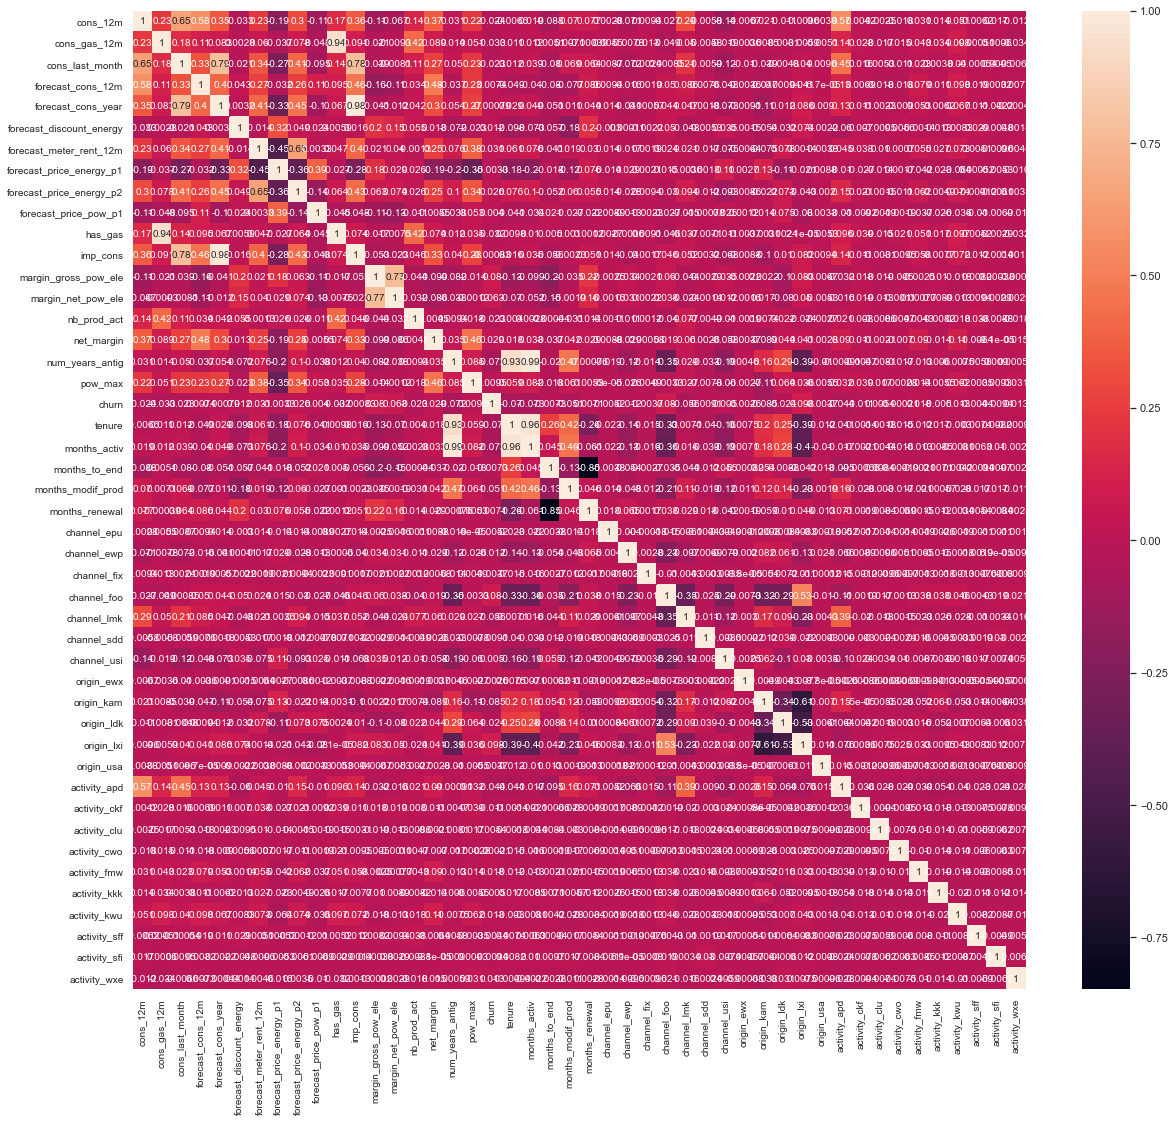

In [119]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values,
yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10}) # Axis ticks size
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

As expected, num_years_antig has a high correlation with months_activ (it provides us the same information).
We can remove variables with very high correlation.

In [122]:
train.drop(columns=["num_years_antig", "forecast_cons_year"],inplace=True)

## 3. Removing outliers
We will replace the outliers with the mean (average of the values excluding outliers).

In [125]:
def replace_outliers_z_score(dataframe,column,Z=3):
    """
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with the mean values.
    Parameters
    ----------
    dataframe : pandas dataframe
        Contains the data where the outliers are to be found
    column : str
        Usually a string with the name of the column
    Returns
    -------
    Dataframe
        With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore
    df=dataframe.copy(deep=True)
    df.dropna(inplace=True,subset=[column])
    
    #Calculate mean without outliers
    df['zscore']=zscore(df[column])
    mean_=df[(df['zscore']>-Z)&(df['zscore']<Z)][column].mean()
    #Replace with mean values
    dataframe[column]=dataframe[column].fillna(mean_)
    
    dataframe['zscore']=zscore(dataframe[column])
    no_outliers=dataframe[(dataframe['zscore']<-Z)|(dataframe['zscore']>Z)].shape[0]
    dataframe.loc[(dataframe['zscore']<-Z)|(dataframe['zscore']>Z),column]=mean_
    
    #print message
    print("Replaced:",no_outliers,'outliers in',column)
    return dataframe.drop(columns='zscore')

In [126]:
for c in features.columns:
    if c!='id':
        features=replace_outliers_z_score(features,c)

Replaced: 276 outliers in mean_year_price_p1_var
Replaced: 0 outliers in mean_year_price_p2_var
Replaced: 0 outliers in mean_year_price_p3_var
Replaced: 120 outliers in mean_year_price_p1_fix
Replaced: 0 outliers in mean_year_price_p2_fix
Replaced: 0 outliers in mean_year_price_p3_fix
Replaced: 122 outliers in mean_year_price_p1
Replaced: 0 outliers in mean_year_price_p2
Replaced: 0 outliers in mean_year_price_p3


In [128]:
features.reset_index(drop=True,inplace=True)

In [129]:
features

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,41.035291,24.752581,16.588752
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,44.458512,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,41.314049,25.025265,16.858411
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,40.730558,24.467516,16.316414


In [130]:
def _find_outliers_iqr(dataframe, column):
    """
    Find outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
        Contains the data where the outliers are to be found
    column : str
        Usually a string with the name of the column
    Returns
    -------
    Dict
        With the values of the iqr, lower_bound and upper_bound
    """
    col=sorted(dataframe[column])
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    
    results={'iqr':iqr,'lower_bound':lower_bound,'upper_bound':upper_bound}
    return results


In [134]:
def remove_outliers_iqr(dataframe,column):
    """
    Remove outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
        Contains the data where the outliers are to be found
    column : str
        Usually a string with the name of the column
    Returns
    -------
    Dataframe
        With outliers under the lower and above the upper bound removed
    """
    outliers = _find_outliers_iqr(dataframe, column)
    removed=dataframe[(dataframe[column]<outliers['lower_bound'])|
                     (dataframe[column]>outliers['upper_bound'])].shape
    dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) & (dataframe[column] < outliers["upper_bound"])]
    print("Removed:", removed[0], " outliers") 
    return dataframe

In [133]:
def remove_outliers_z_score(dataframe,column,Z=3):
    """
    Remove outliers using the Z score. Values with more than 3 are removed.
    Parameters
    ----------
    dataframe : pandas dataframe
        Contains the data where the outliers are to be found
    column : str
        Usually a string with the name of the column
    Returns
    -------
    Dataframe
        With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore
    dataframe["zscore"] = zscore(dataframe[column])
    removed = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape
    dataframe = dataframe[(dataframe["zscore"] > -Z) & (dataframe["zscore"] < Z)]
    print("Removed:", removed[0], " outliers of ", column) 
    return dataframe.drop(columns="zscore")

array([0.12413685, 0.15000508])

In [135]:
train = replace_outliers_z_score(train,"cons_12m")
train = replace_outliers_z_score(train,"cons_gas_12m")
train = replace_outliers_z_score(train,"cons_last_month")
train = replace_outliers_z_score(train,"forecast_cons_12m") 
#train = replace_outliers_z_score(train,"forecast_cons_year") 
train = replace_outliers_z_score(train,"forecast_discount_energy") 
train = replace_outliers_z_score(train,"forecast_meter_rent_12m") 
train = replace_outliers_z_score(train,"forecast_price_energy_p1") 
train = replace_outliers_z_score(train,"forecast_price_energy_p2") 
train = replace_outliers_z_score(train,"forecast_price_pow_p1") 
train = replace_outliers_z_score(train,"imp_cons")
train = replace_outliers_z_score(train,"margin_gross_pow_ele") 
train = replace_outliers_z_score(train,"margin_net_pow_ele") 
train = replace_outliers_z_score(train,"net_margin")
train = replace_outliers_z_score(train,"pow_max")
train = replace_outliers_z_score(train,"months_activ")
train = replace_outliers_z_score(train,"months_to_end")
train = replace_outliers_z_score(train,"months_modif_prod")
train = replace_outliers_z_score(train,"months_renewal")

Replaced: 174 outliers in cons_12m
Replaced: 118 outliers in cons_gas_12m
Replaced: 0 outliers in cons_last_month
Replaced: 425 outliers in forecast_cons_12m
Replaced: 575 outliers in forecast_discount_energy
Replaced: 1 outliers in forecast_meter_rent_12m
Replaced: 300 outliers in forecast_price_energy_p1
Replaced: 0 outliers in forecast_price_energy_p2
Replaced: 240 outliers in forecast_price_pow_p1
Replaced: 0 outliers in imp_cons
Replaced: 238 outliers in margin_gross_pow_ele
Replaced: 220 outliers in margin_net_pow_ele
Replaced: 185 outliers in net_margin
Replaced: 293 outliers in pow_max
Replaced: 462 outliers in months_activ
Replaced: 2 outliers in months_to_end
Replaced: 156 outliers in months_modif_prod
Replaced: 133 outliers in months_renewal


In [139]:
train.reset_index(drop=True,inplace=True)

/Users/yiranxu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yiranxu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yiranxu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

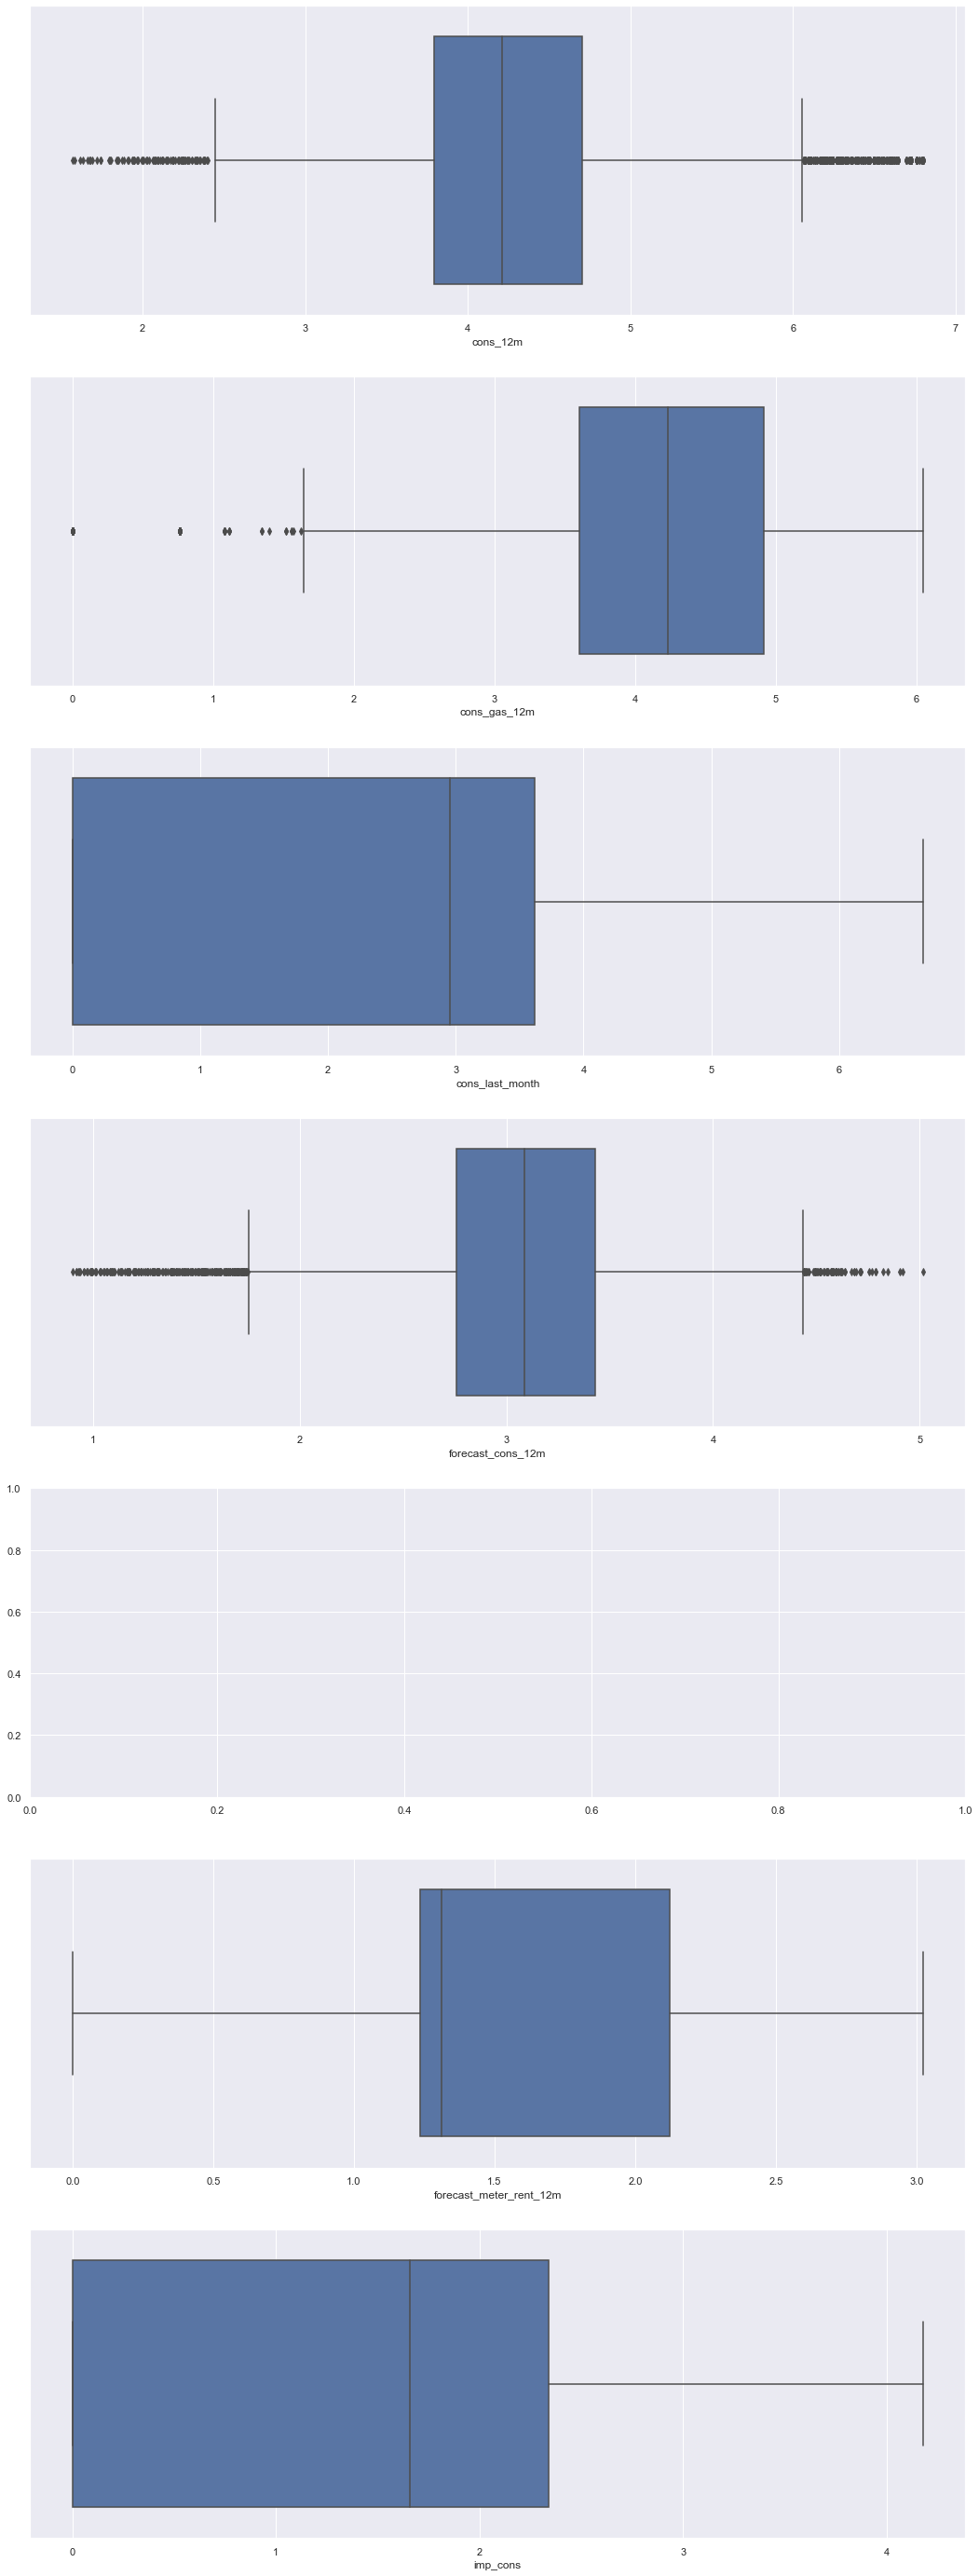

In [140]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot boxplots
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0]) 
sns.boxplot((train[train["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1]) 
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2]) 
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3]) 
#sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4]) 
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5]) 
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

## 4. Pickling

In [143]:
PICKLE_TRAIN_DIR = os.path.join(".",'processed_data','train_data.pkl')
PICKLE_HISTORY_DIR = os.path.join(".", "processed_data", "history_data.pkl")


In [145]:
pd.to_pickle(train,PICKLE_TRAIN_DIR)
pd.to_pickle(features,PICKLE_HISTORY_DIR)